In [1]:
from mxnet import nd,autograd,gluon   
import matplotlib.pyplot as plt

In [2]:
def transform(x,y):
    return x.astype('float32')/255,y.astype('float32')

In [3]:
mnist_train=gluon.data.vision.FashionMNIST(r'C:\Users\ZouJiu\ch\FashionMNIST',train=True,transform=transform)
mnist_test=gluon.data.vision.FashionMNIST(r'C:\Users\ZouJiu\ch\FashionMNIST',train=False,transform=transform)

In [4]:
def showImages(xs):
    n=xs.shape[0]
    _,figs=plt.subplots(1,n,figsize=(10,10))
    for i in range(n):
        figs[i].imshow(x[i].reshape((28,28)).asnumpy(),cmap='gray')
        figs[i].axes.get_xaxis().set_visible(False)
        figs[i].axes.get_yaxis().set_visible(False)
    plt.show()

In [5]:
def getLabels(ys):
    labels = ['t-shirt', 'trouser', 'pullover', 'dress,', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    result=[]
    for i in ys:
        result.append(labels[int(i)])
    return result

In [6]:
batch_size=256
train_data=gluon.data.DataLoader(mnist_train,batch_size,shuffle=True)
test_data=gluon.data.DataLoader(mnist_test,batch_size,shuffle=False)

In [7]:
num_inputs=28*28
num_outputs=10
w=nd.random_normal(shape=(num_inputs,num_outputs))
b=nd.random_normal(shape=num_outputs)
params=[w,b]

In [8]:
def softmax(yhat):
    exp=nd.exp(yhat)
    partition=exp.sum(axis=1,keepdims=True)
    return exp/partition

In [9]:
def net(x):
    return softmax(nd.dot(x.reshape((-1,num_inputs)),w)+b)

In [10]:
def crossEntropy(yhat,y):
    return - nd.log(nd.pick(yhat,y))

In [11]:
for param in params:
    param.attach_grad()

In [12]:
def SGD(params,eta):
    for param in params:
        param[:]=param-eta*param.grad

In [13]:
eta=0.1
epochs=10

In [14]:
for e in range(epochs):
    train_loss=0
    for x,y in train_data:
        with autograd.record():
            yhat=net(x)
            loss=crossEntropy(yhat,y)
        loss.backward()
        SGD(params,eta/batch_size)
        train_loss+=nd.mean(loss).asscalar()
    print('Epoch %d. Loss:%f'%(e,train_loss/len(train_data)))

Epoch 0. Loss:3.623152
Epoch 1. Loss:1.930890
Epoch 2. Loss:1.596055
Epoch 3. Loss:1.419833
Epoch 4. Loss:1.307394
Epoch 5. Loss:1.224662
Epoch 6. Loss:1.165653
Epoch 7. Loss:nan
Epoch 8. Loss:nan
Epoch 9. Loss:nan


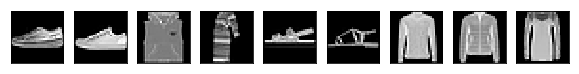

Ground Truth:
['t-shirt', 'trouser', 'pullover', 'pullover', 'dress,', 'pullover', 'bag', 'shirt', 'sandal']
Prediction:
['t-shirt', 't-shirt', 't-shirt', 't-shirt', 't-shirt', 't-shirt', 't-shirt', 't-shirt', 't-shirt']


In [15]:
xs,ys=mnist_test[0:9]
showImages(xs)

print('Ground Truth:')
print(getLabels(ys))

yhat=net(xs).argmax(axis=1)
print('Prediction:')
print(getLabels(yhat.asnumpy()))